# EDA sobre los precios de billetes de avión

## Preparación del notebook

In [2]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import seaborn.objects as so
%matplotlib inline


In [3]:
df=pd.read_csv('data\\Clean_Dataset.csv')

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Introducción al caso

El objetivo del estudio es analizar el conjunto de datos de reservas de vuelos obtenido del sitio web "Ease My Trip"
y realizar diversas pruebas estadísticas de hipótesis para obtener información significativa del mismo.
Easemytrip" es una plataforma de Internet para reservar billetes de avión.
Un estudio exhaustivo de los datos ayudará a descubrir información valiosa que será de enorme valor para los pasajeros.

## Preguntas de investigación

El objetivo de nuestro estudio es responder a las siguientes preguntas de investigación:

    a) ¿Varía el precio con las aerolíneas?

    b) ¿Cómo se ve afectado el precio cuando los billetes se compran sólo 1 ó 2 días antes de la salida?
    
    c) ¿Cambia el precio del billete en función de la hora de salida y de llegada?

    d) ¿Cómo varía el precio con el cambio de origen y destino?
    
    e) ¿Cómo varía el precio del billete entre la clase Turista y la Business?

## Carga de los datos

In [4]:
'''cargamos fcihero desde la carpeta data'''
df=pd.read_csv('data\\Clean_Dataset.csv')

'''guardamos dataframe original por si lo necesitamos más adelante'''
df_original=df

'''mostrasmos 5 primeros registros'''

df.columns = df.columns.str.strip()

df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Exploración y preparación de los datos

"'Parece que no hay valores nulos"

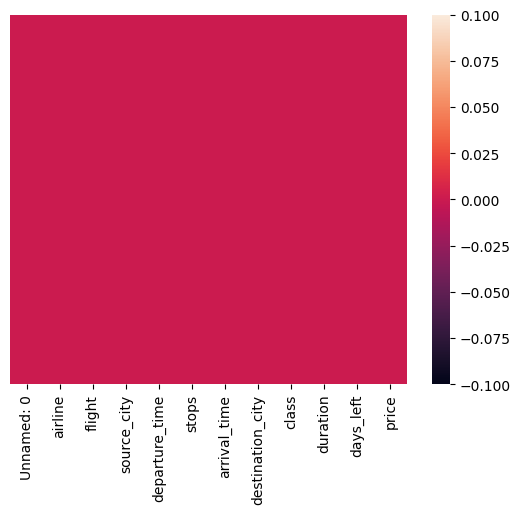

In [5]:
'''Inspeccionamos de forma gráfica el nivel de valores nulos que hay en el dataframe'''

sns.heatmap(df.isna(),yticklabels=False);

''''Parece que no hay valores nulos'''


In [6]:
'''Inspeccionamos los tipos de datos de cada varialble y la cantidad de filas, columnas'''
'''Comprobamos que no hay valores nulos'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
'''Obtenemos el número de valores únicos de las columnnas con valores categóricos'''

for col in df.select_dtypes(include='object').columns:
    
    print(f"{col:25} ---> {df[col].nunique():15} unique values")

airline                   --->               6 unique values
flight                    --->            1561 unique values
source_city               --->               6 unique values
departure_time            --->               6 unique values
stops                     --->               3 unique values
arrival_time              --->               6 unique values
destination_city          --->               6 unique values
class                     --->               2 unique values


In [8]:
'''kpis básicos de las columnuas no catagoricas'''
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [9]:
#obtenemos una muestra de registros
sample=df[df['class']=='Economy'].query("flight=='UK-996' and days_left== 10")
sample

# vemos que el campo duración no tiene sentido entendido como duración del vuelo
# por lo tanto lo eliminaremos el campo y los duplicados que generara su eliminación

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
44441,44441,Vistara,UK-996,Mumbai,Evening,zero,Night,Delhi,Economy,2.17,10,6678
54250,54250,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,14.17,10,12468
54251,54251,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,10,12468
62905,62905,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,14.08,10,11129
62906,62906,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,15.08,10,11129
62913,62913,Vistara,UK-996,Mumbai,Evening,one,Evening,Kolkata,Economy,23.58,10,11129
62914,62914,Vistara,UK-996,Mumbai,Evening,one,Evening,Kolkata,Economy,25.08,10,11129
71449,71449,Vistara,UK-996,Mumbai,Evening,one,Afternoon,Hyderabad,Economy,18.08,10,11129
71450,71450,Vistara,UK-996,Mumbai,Evening,one,Evening,Hyderabad,Economy,22.50,10,11129
71451,71451,Vistara,UK-996,Mumbai,Evening,one,Evening,Hyderabad,Economy,25.42,10,11129


A continución:

    1- Eliminaremos del dataframe la columna Unnamed, parece ser el índice anterior

    2- El campo duración esta en formato horas.minutos ejemplo= 2.17 son 2 horas y 17 minutos. Es algo extraño que existan duraciones de vuelo de 49 horas con 83 minutos, eliminaremos el campo y los reg duplicado que genera al eliminarlo.
    
    3- La columna price rejefla el precio en rupias ya que obsevando las aerolinias, origenes y destinos vemos que todo esta ubicado en la India, para hacerlo más familiar a la audiencia transformaremos este campo a € con un cambio de 1€ --> 88 rupias

    4- Daremos orden a los campos de salida y llegada de los vuelos

In [10]:
df=df.drop(['Unnamed: 0','duration'],axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [11]:
df.shape

(300153, 10)

In [12]:
df = df.drop_duplicates()
df.shape

(260603, 10)

In [13]:
sample=df[df['class']=='Economy'].query("flight=='UK-996' and days_left== 10")
sample

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
44441,Vistara,UK-996,Mumbai,Evening,zero,Night,Delhi,Economy,10,6678
54250,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,10,12468
62905,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,10,11129
62913,Vistara,UK-996,Mumbai,Evening,one,Evening,Kolkata,Economy,10,11129
71449,Vistara,UK-996,Mumbai,Evening,one,Afternoon,Hyderabad,Economy,10,11129
71450,Vistara,UK-996,Mumbai,Evening,one,Evening,Hyderabad,Economy,10,11129


In [14]:
df2=df
df2=df2.drop('price',axis=1)
df2 = df.drop_duplicates()
df2.shape
#comprobamos que el campo duración duplicaba los registro con un df.shape(260603, 10)=df2(260603, 10)

(260603, 10)

In [15]:
sample=df[df['class']=='Economy'].query("flight=='UK-996' and days_left== 10")
sample

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
44441,Vistara,UK-996,Mumbai,Evening,zero,Night,Delhi,Economy,10,6678
54250,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,10,12468
62905,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,10,11129
62913,Vistara,UK-996,Mumbai,Evening,one,Evening,Kolkata,Economy,10,11129
71449,Vistara,UK-996,Mumbai,Evening,one,Afternoon,Hyderabad,Economy,10,11129
71450,Vistara,UK-996,Mumbai,Evening,one,Evening,Hyderabad,Economy,10,11129


In [16]:
df['price_euros']=df['price']/88

In [17]:
turnos=[ 'Early_Morning', 'Morning','Afternoon', 'Evening', 'Night',
       'Late_Night']

rt=list(enumerate(turnos))
orden_turnos=[]
for i in range(len(rt)):
       orden_turnos.append(str(rt[i][0]+1)+'-'+str(rt[i][1]))
orden_turnos

dict_turnos = dict(zip(turnos, orden_turnos))
df['departure_time']=df['departure_time'].replace(dict_turnos)

df['arrival_time']=df['arrival_time'].replace(dict_turnos)

df.head()




,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,price_euros
0,SpiceJet,SG-8709,Delhi,4-Evening,zero,5-Night,Mumbai,Economy,1,5953,67.647727
1,SpiceJet,SG-8157,Delhi,1-Early_Morning,zero,2-Morning,Mumbai,Economy,1,5953,67.647727
2,AirAsia,I5-764,Delhi,1-Early_Morning,zero,1-Early_Morning,Mumbai,Economy,1,5956,67.681818
3,Vistara,UK-995,Delhi,2-Morning,zero,3-Afternoon,Mumbai,Economy,1,5955,67.670455
4,Vistara,UK-963,Delhi,2-Morning,zero,2-Morning,Mumbai,Economy,1,5955,67.670455


In [18]:

df.groupby(['departure_time']).flight.count()

departure_time
1-Early_Morning    57795
2-Morning          60401
3-Afternoon        41898
4-Evening          58564
5-Night            40687
6-Late_Night        1258
Name: flight, dtype: int64

In [19]:
# definomos PK como ('airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class', 'days_left'])

#buscamos duplicados o datos extraños

temp=df.groupby(['airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class', 'days_left'],as_index=False)['price_euros'].count()

temp[temp['price_euros']>1]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price_euros
296,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,3,2
298,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,5,2
299,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,6,2
300,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,7,2
307,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,15,2
...,...,...,...,...,...,...,...,...,...,...
235773,Vistara,UK-996,Mumbai,4-Evening,one,4-Evening,Kolkata,Economy,29,2
235781,Vistara,UK-996,Mumbai,4-Evening,one,4-Evening,Kolkata,Economy,37,2
235788,Vistara,UK-996,Mumbai,4-Evening,one,4-Evening,Kolkata,Economy,44,2
235793,Vistara,UK-996,Mumbai,4-Evening,one,4-Evening,Kolkata,Economy,49,2


In [20]:
sample=df[(df['flight']=='I5-1229')&(df['source_city']=='Chennai') &(df['days_left']==15)&(df['destination_city']=='Delhi')]
sample
#observamos que hay duplicados y optamos por quedarnos con el mínimo


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,price_euros
182085,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,15,7329,83.284091
182113,AirAsia,I5-1229,Chennai,4-Evening,one,5-Night,Delhi,Economy,15,7353,83.556818
182114,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,15,7353,83.556818


In [21]:

df=df.groupby(['airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class', 'days_left'],as_index=False)['price_euros'].min()




## Análisis y respuesta a cuestiones

#### ¿Varía el precio con las aerolíneas?

In [22]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left',
       'price_euros'],
      dtype='object')

In [23]:
temp=df.pivot(index=[ 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class','days_left'],columns=['airline'],values='price_euros')
temp.reset_index(inplace=True)
temp

airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,6E-102,Hyderabad,4-Evening,one,5-Night,Bangalore,Economy,19,NaN,NaN,NaN,34.909091,NaN,NaN
1,6E-102,Hyderabad,4-Evening,one,5-Night,Bangalore,Economy,21,NaN,NaN,NaN,34.909091,NaN,NaN
2,6E-102,Hyderabad,4-Evening,one,5-Night,Bangalore,Economy,23,NaN,NaN,NaN,34.909091,NaN,NaN
3,6E-102,Hyderabad,4-Evening,one,5-Night,Bangalore,Economy,26,NaN,NaN,NaN,34.909091,NaN,NaN
4,6E-102,Hyderabad,4-Evening,one,5-Night,Bangalore,Economy,28,NaN,NaN,NaN,34.909091,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235989,UK-996,Mumbai,4-Evening,zero,5-Night,Delhi,Economy,45,NaN,NaN,NaN,NaN,NaN,26.579545
235990,UK-996,Mumbai,4-Evening,zero,5-Night,Delhi,Economy,46,NaN,NaN,NaN,NaN,NaN,27.147727
235991,UK-996,Mumbai,4-Evening,zero,5-Night,Delhi,Economy,47,NaN,NaN,NaN,NaN,NaN,26.579545
235992,UK-996,Mumbai,4-Evening,zero,5-Night,Delhi,Economy,48,NaN,NaN,NaN,NaN,NaN,26.579545


<AxesSubplot:xlabel='airline', ylabel='price_euros'>

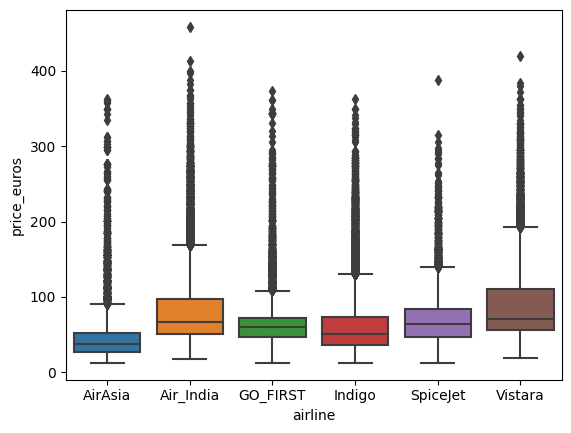

In [24]:
temp=df.pivot(index=[ 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class','airline'],columns=['days_left'],values='price_euros')
temp.reset_index(inplace=True)
temp=df[df['class']=='Economy']

sns.boxplot(data=temp,x='airline',y='price_euros')


In [25]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left',
       'price_euros'],
      dtype='object')

In [26]:
df.groupby(['source_city','destination_city','class','days_left'],as_index=False).price_euros.mean()

,source_city,destination_city,class,days_left,price_euros
0,Bangalore,Chennai,Business,1,743.693182
1,Bangalore,Chennai,Business,2,702.747727
2,Bangalore,Chennai,Business,3,705.001515
3,Bangalore,Chennai,Business,4,608.054633
4,Bangalore,Chennai,Business,5,570.820592
...,...,...,...,...,...
2911,Mumbai,Kolkata,Economy,45,60.570497
2912,Mumbai,Kolkata,Economy,46,59.166885
2913,Mumbai,Kolkata,Economy,47,59.461072
2914,Mumbai,Kolkata,Economy,48,61.428550


In [27]:
temp=df[df['class']=='Business'].groupby(['source_city','destination_city','class'],as_index=False).price_euros.mean()
temp=temp.pivot(index=(['source_city','class']),columns='destination_city', values='price_euros')
temp_t=temp.transpose().mean().to_frame()
temp=temp.mean().to_frame()
temp_t=temp_t.reset_index()
temp_t.rename(columns={0:'price_source','source_city':'city'},inplace=True)
temp=temp.reset_index()
temp.rename(columns={0:'price_destination'},inplace=True)
temp_bisn=pd.merge(temp_t,temp, left_on='city',right_on='destination_city')
temp_bisn.drop(['destination_city'], axis=1,inplace=True)
temp_bisn_melt=pd.melt(temp_bisn, id_vars=['city','class'],value_vars=['price_source','price_destination'], var_name='Precio',value_name='valor')
temp=df[df['class']=='Economy'].groupby(['source_city','destination_city','class'],as_index=False).price_euros.mean()
temp=temp.pivot(index=(['source_city','class']),columns='destination_city', values='price_euros')
temp_t=temp.transpose().mean().to_frame()
temp=temp.mean().to_frame()
temp_t=temp_t.reset_index()
temp_t.rename(columns={0:'price_source','source_city':'city'},inplace=True)
temp=temp.reset_index()
temp.rename(columns={0:'price_destination'},inplace=True)
temp_eco=pd.merge(temp_t,temp, left_on='city',right_on='destination_city')
temp_eco.drop(['destination_city'], axis=1,inplace=True)
temp_eco_melt=pd.melt(temp_eco, id_vars=['city','class'],value_vars=['price_source','price_destination'], var_name='Precio',value_name='valor')
temp_melt=pd.concat([temp_bisn_melt,temp_eco_melt], ignore_index=True)

In [28]:
temp_eco

,city,class,price_source,price_destination
0,Bangalore,Economy,72.122480,72.912373
1,Chennai,Economy,69.069475,73.888218
2,Delhi,Economy,70.605163,67.116820
3,Hyderabad,Economy,66.912687,69.749675
4,Kolkata,Economy,80.643786,78.281856
5,Mumbai,Economy,70.450884,67.855534


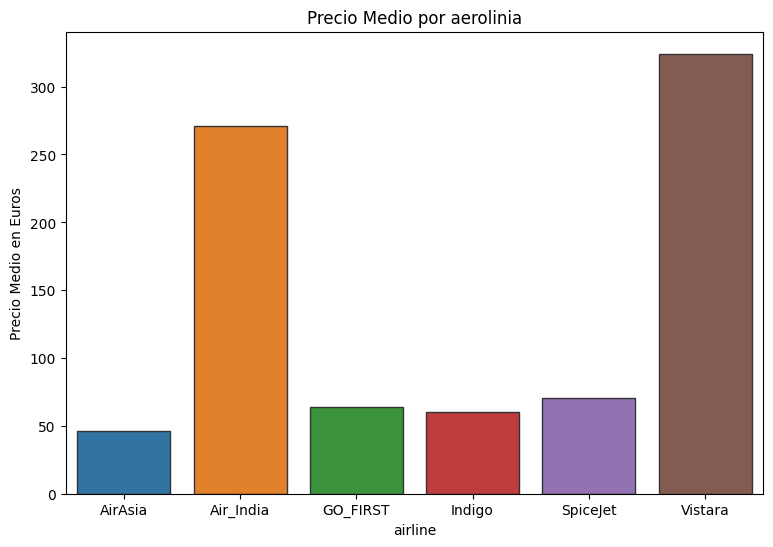

In [29]:
temp=df.groupby('airline',as_index=False).price_euros.mean()


plt.figure(figsize=(9,6))
sns.barplot(x = 'airline',y='price_euros',data = temp,edgecolor=".2")
plt.ylabel("Precio Medio en Euros")
plt.title("Precio Medio por aerolinia");

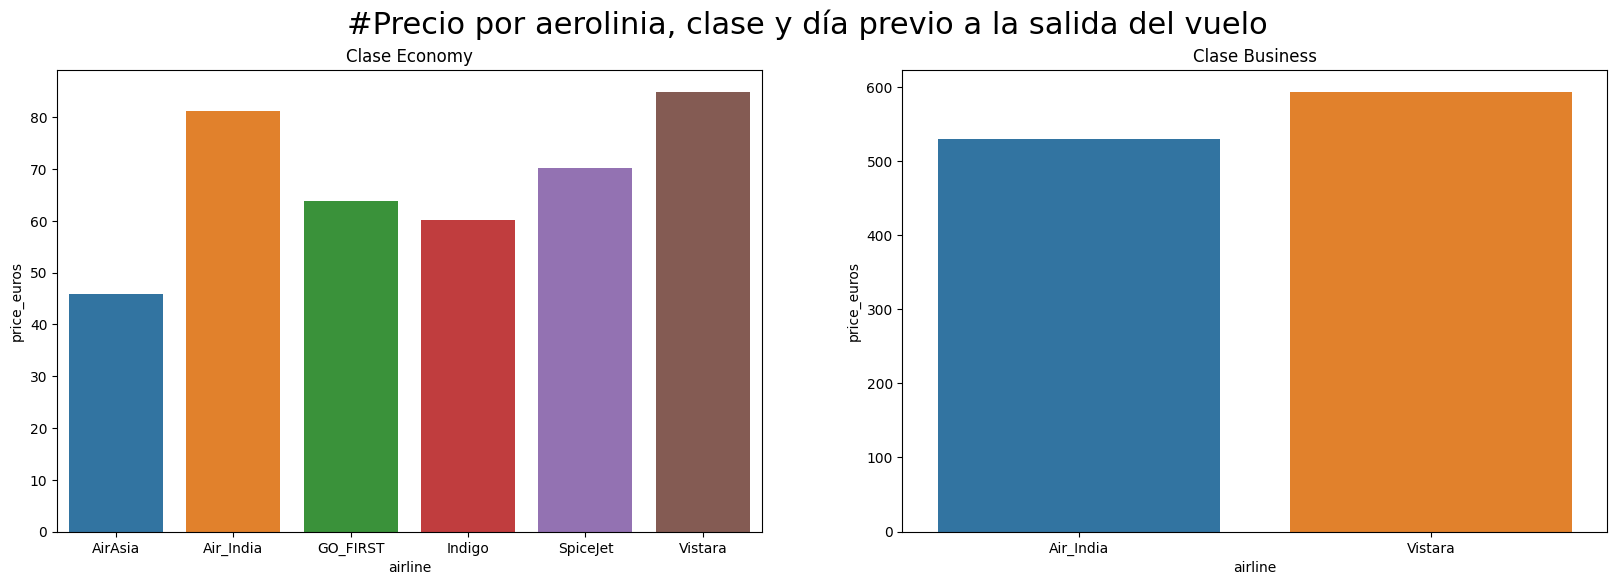

In [30]:
temp=df.groupby(['airline', 'class'],as_index=False).price_euros.mean()


fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.barplot(x='airline',y='price_euros',data=temp[temp['class']=='Economy'],ax=ax[0])
g2=sns.barplot(x='airline',y='price_euros',data=temp[temp['class']=='Business'],ax=ax[1])
fig.suptitle("#Precio por aerolinia, clase y día previo a la salida del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business");

La aerolinia Vistara es la aerolínea con precios más altos tanto en Businnes como en Economy, siendo en esta clase sensiblemente más caro que AirAsia que tiene el precio medio más bajo de todos. 

#### ¿Cómo se ve afectado el precio cuando los billetes se compran sólo 1 ó 2 días antes de la salida?

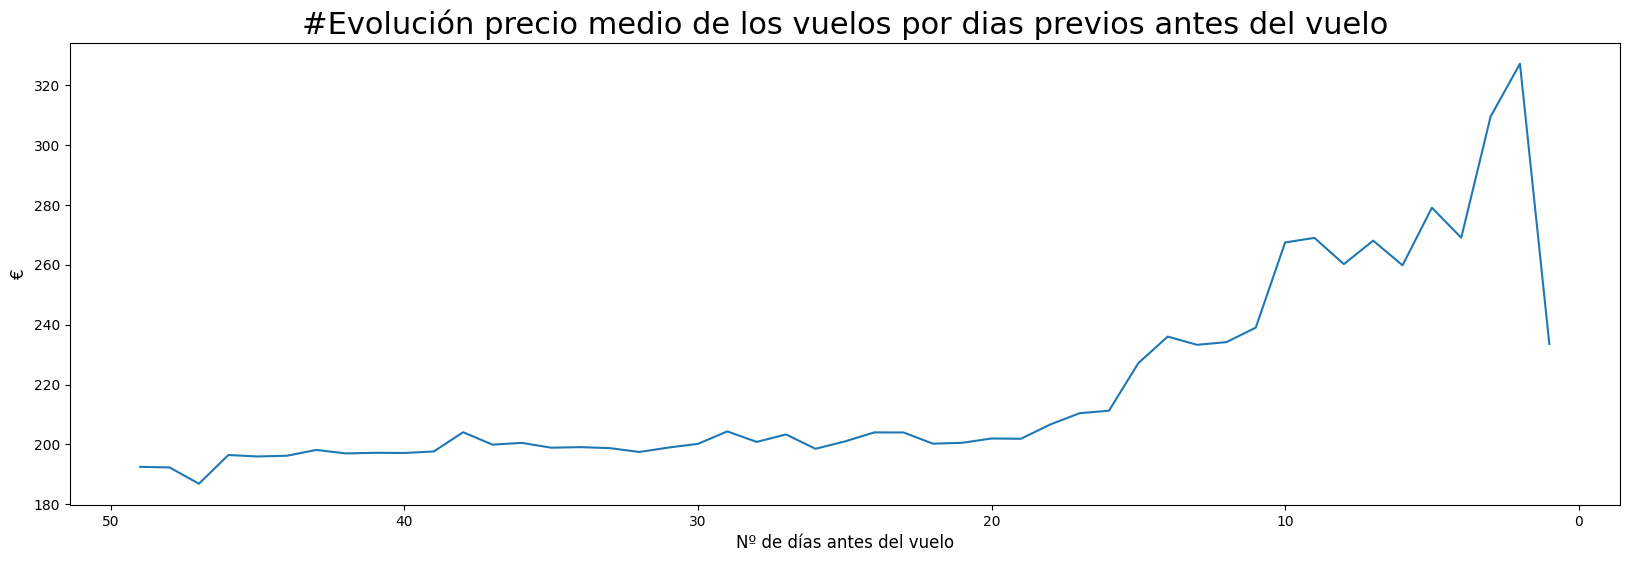

In [31]:
temp=df.groupby('days_left',as_index=False).price_euros.mean().sort_values('days_left',ascending=False)
fig,ax=plt.subplots(figsize=(20,6))
g=sns.lineplot(x='days_left',y='price_euros',data=temp)
plt.ylabel("€",fontsize=12)
plt.xlabel("Nº de días antes del vuelo",fontsize=12)
plt.title("#Evolución precio medio de los vuelos por dias previos antes del vuelo",fontsize=22)
g.invert_xaxis();

#Cuidado esta gráfica es engañosa

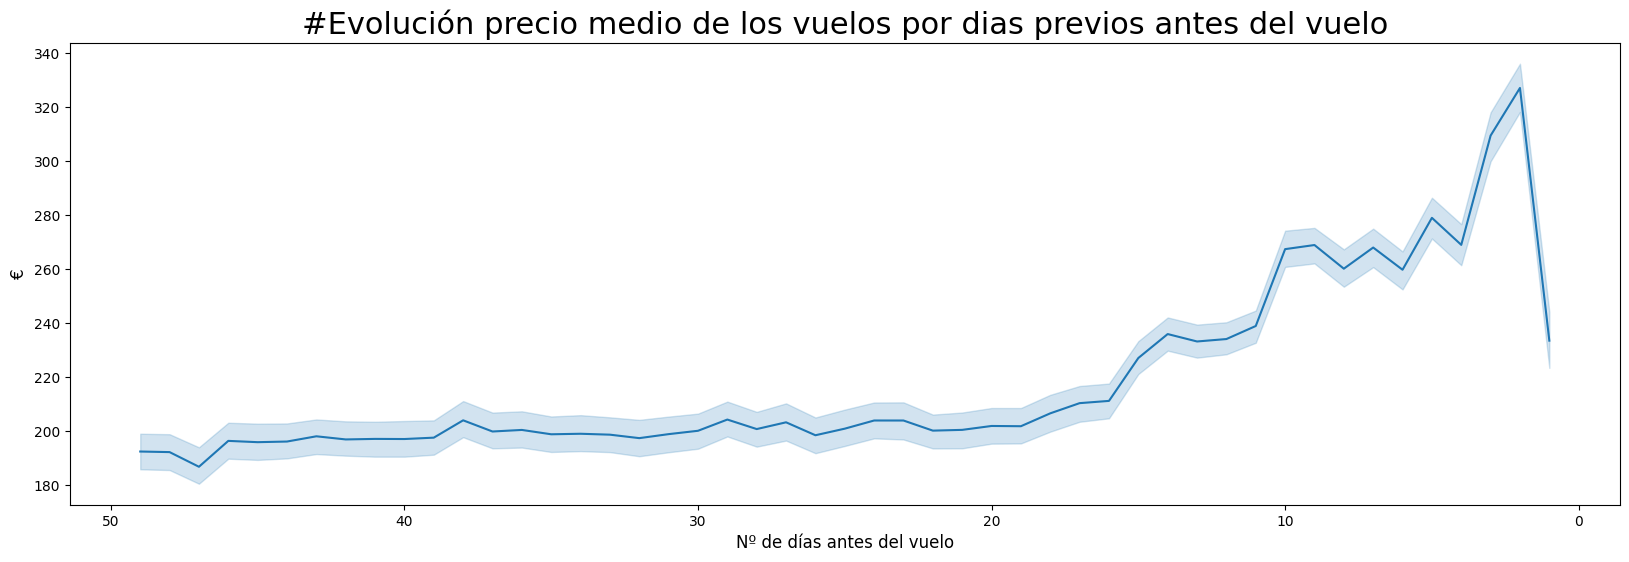

In [32]:
temp=df.loc[:,('days_left','price_euros')].sort_values('days_left',ascending=False)
fig,ax=plt.subplots(figsize=(20,6))
g=sns.lineplot(x='days_left',y='price_euros',data=temp)
plt.ylabel("€",fontsize=12)
plt.xlabel("Nº de días antes del vuelo",fontsize=12)
plt.title("#Evolución precio medio de los vuelos por dias previos antes del vuelo",fontsize=22)
g.invert_xaxis();

#Cuidado esta gráfica es engañosa

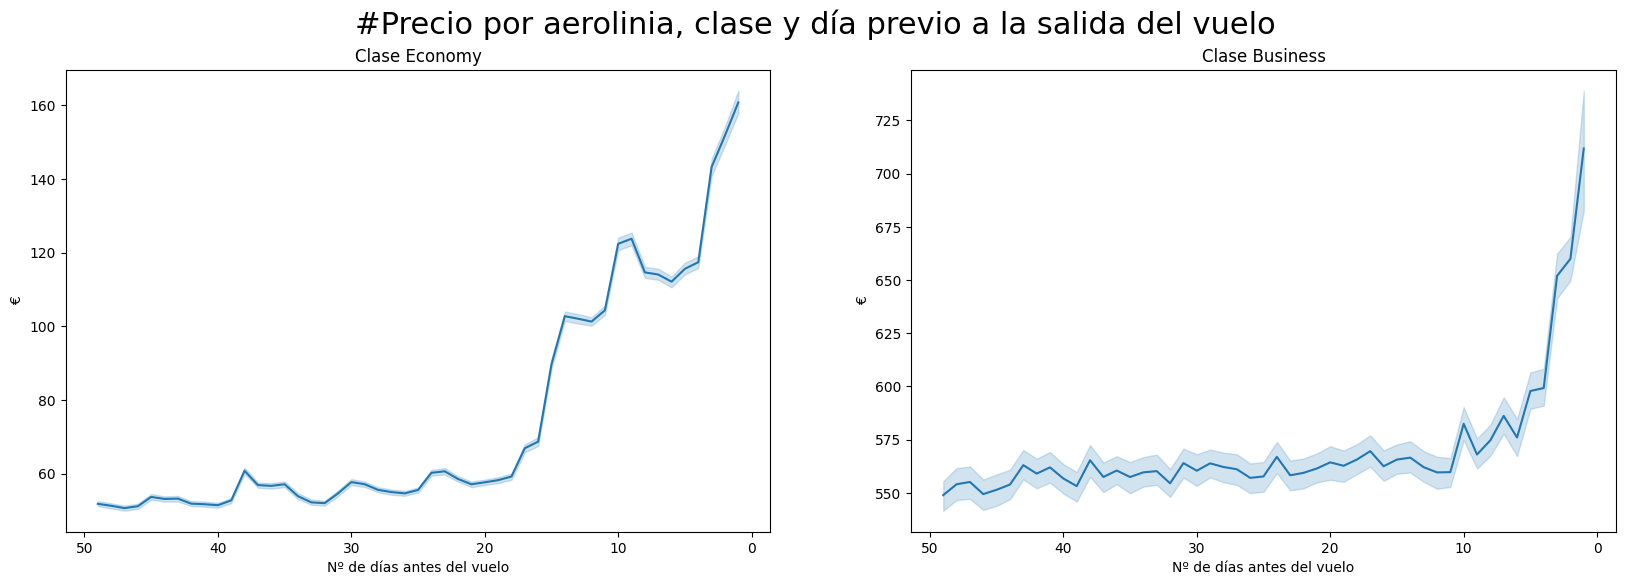

In [33]:
temp=df.loc[:,('days_left','price_euros','class')]


fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Economy'],ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Business'],ax=ax[1])
fig.suptitle("#Precio por aerolinia, clase y día previo a la salida del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xlabel='Nº de días antes del vuelo', ylabel='€')
ax[1].set(xlabel='Nº de días antes del vuelo', ylabel='€')
g1.invert_xaxis()
g2.invert_xaxis();

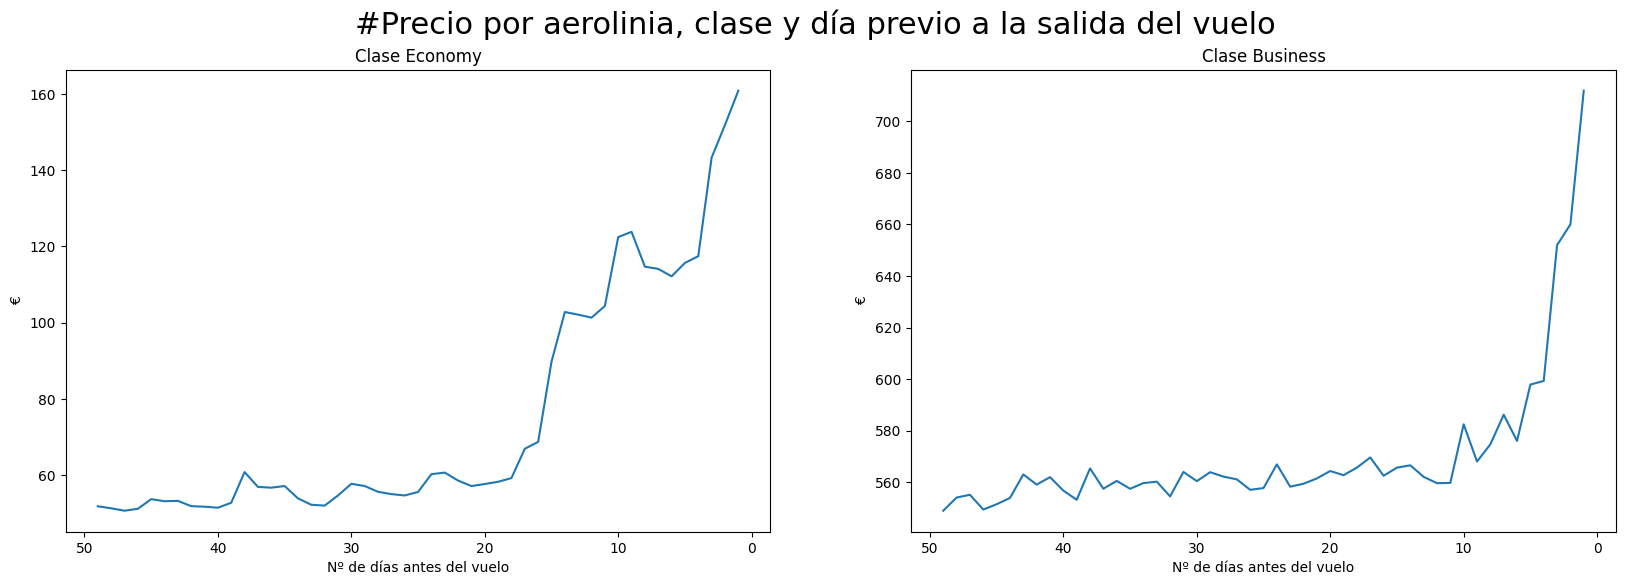

In [34]:
temp1=df[df['class']=='Economy'].groupby(['days_left','class'],as_index=False).price_euros.mean()
temp1['dif_price_euros'] = temp1['price_euros'].diff(periods=-1)

temp2=df[df['class']=='Business'].groupby(['days_left','class'],as_index=False).price_euros.mean()
temp2['dif_price_euros'] = temp2['price_euros'].diff(periods=-1)

fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=temp1,ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=temp2,ax=ax[1])
fig.suptitle("#Precio por aerolinia, clase y día previo a la salida del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xlabel='Nº de días antes del vuelo', ylabel='€')
ax[1].set(xlabel='Nº de días antes del vuelo', ylabel='€')
g1.invert_xaxis()
g2.invert_xaxis();

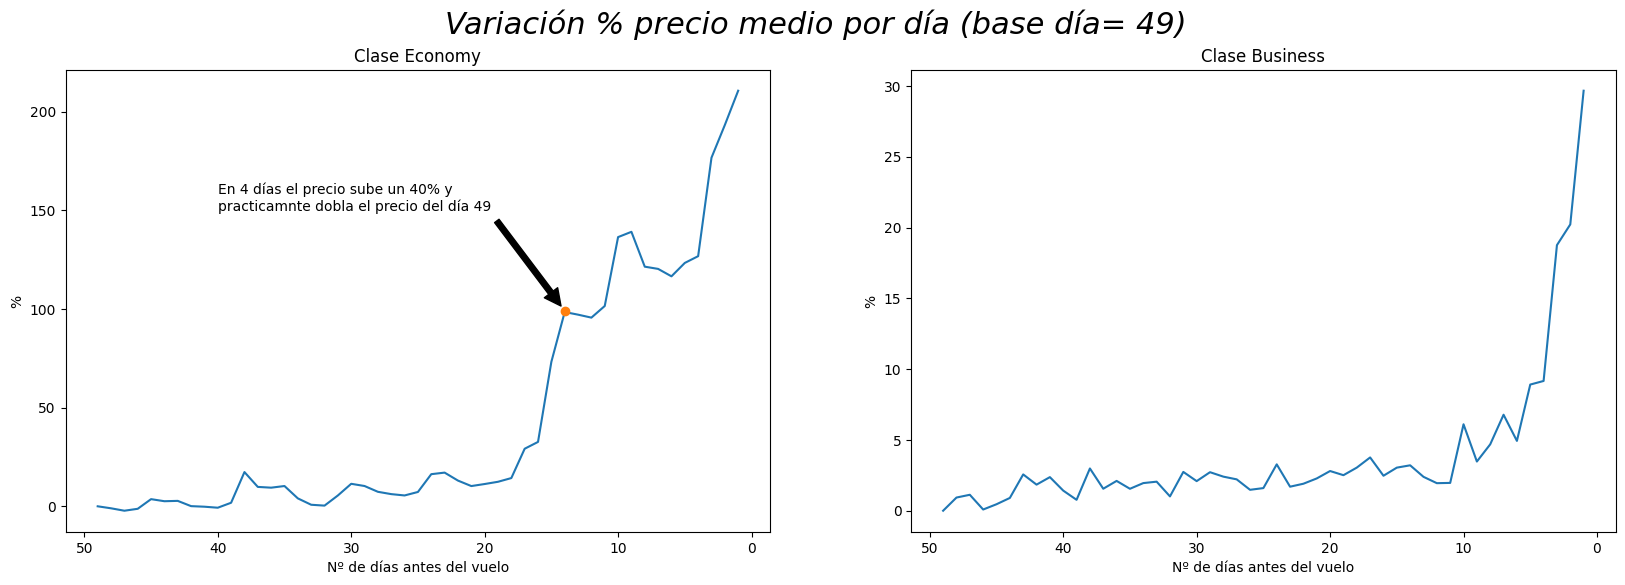

In [35]:
temp1=df[df['class']=='Economy'].groupby(['days_left','class'],as_index=False).price_euros.mean().sort_values('days_left',ascending=False)
temp1['dif_price_euros'] = temp1['price_euros'].diff()
temp1['dif_price_euros_acc']=temp1.dif_price_euros.cumsum()
pdays_max=temp1[temp1['days_left']==temp1['days_left'].max()].price_euros.to_list()
temp1['dif_price_euros_acc%']=((temp1.price_euros/pdays_max[0])-1)*100

temp2=df[df['class']=='Business'].groupby(['days_left','class'],as_index=False).price_euros.mean().sort_values('days_left',ascending=False)
temp2['dif_price_euros'] = temp2['price_euros'].diff()
temp2['dif_price_euros_acc']=temp2.dif_price_euros.cumsum()
pdays_max=temp2[temp2['days_left']==temp2['days_left'].max()].price_euros.to_list()
temp2['dif_price_euros_acc%']=((temp2.price_euros/pdays_max[0])-1)*100

fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='dif_price_euros_acc%',data=temp1,ax=ax[0])
g2=sns.lineplot(x='days_left',y='dif_price_euros_acc%',data=temp2,ax=ax[1])
fig.suptitle("Variación % precio medio por día (base día= 49)",fontsize=22,style='italic')
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xlabel='Nº de días antes del vuelo', ylabel='%')
ax[1].set(xlabel='Nº de días antes del vuelo', ylabel='%')
#ax[0].text(50,77, 'A 15 días del vuelo el precio es un 78% más caro que el día 49', style='italic',
        #bbox={'facecolor':'blue','boxstyle':'rarrow','alpha':0.5, 'pad':1}  )
#ax[0].plot([17],[29],'o')
ax[0].plot([14],[99],'o')
#g1.axvline(14,color='blue')
#g1.axhline(100,color='blue')
#g1.axhspan(29,77,color='aqua', alpha=0.4)
#g1.axvspan(15,17,color='aqua', alpha=0.4)
ax[0].annotate(f'En 4 días el precio sube un 40% y\npracticamnte dobla el precio del día 49',
        xy=(14,99), xytext=(40,150),arrowprops=dict(facecolor='black',shrink=0.05))
g1.invert_xaxis()
g2.invert_xaxis();

In [36]:
temp1

,days_left,class,price_euros,dif_price_euros,dif_price_euros_acc,dif_price_euros_acc%
48,49,Economy,51.781158,NaN,NaN,0.000000
47,48,Economy,51.257390,-0.523767,-0.523767,-1.011502
46,47,Economy,50.620819,-0.636571,-1.160338,-2.240851
45,46,Economy,51.125888,0.505069,-0.655270,-1.265460
44,45,Economy,53.659383,2.533495,1.878226,3.627238
43,44,Economy,53.113962,-0.545422,1.332804,2.573917
42,43,Economy,53.204848,0.090886,1.423690,2.749436
41,42,Economy,51.823177,-1.381670,0.042019,0.081148
40,41,Economy,51.673813,-0.149365,-0.107345,-0.207306
39,40,Economy,51.408668,-0.265144,-0.372490,-0.719354


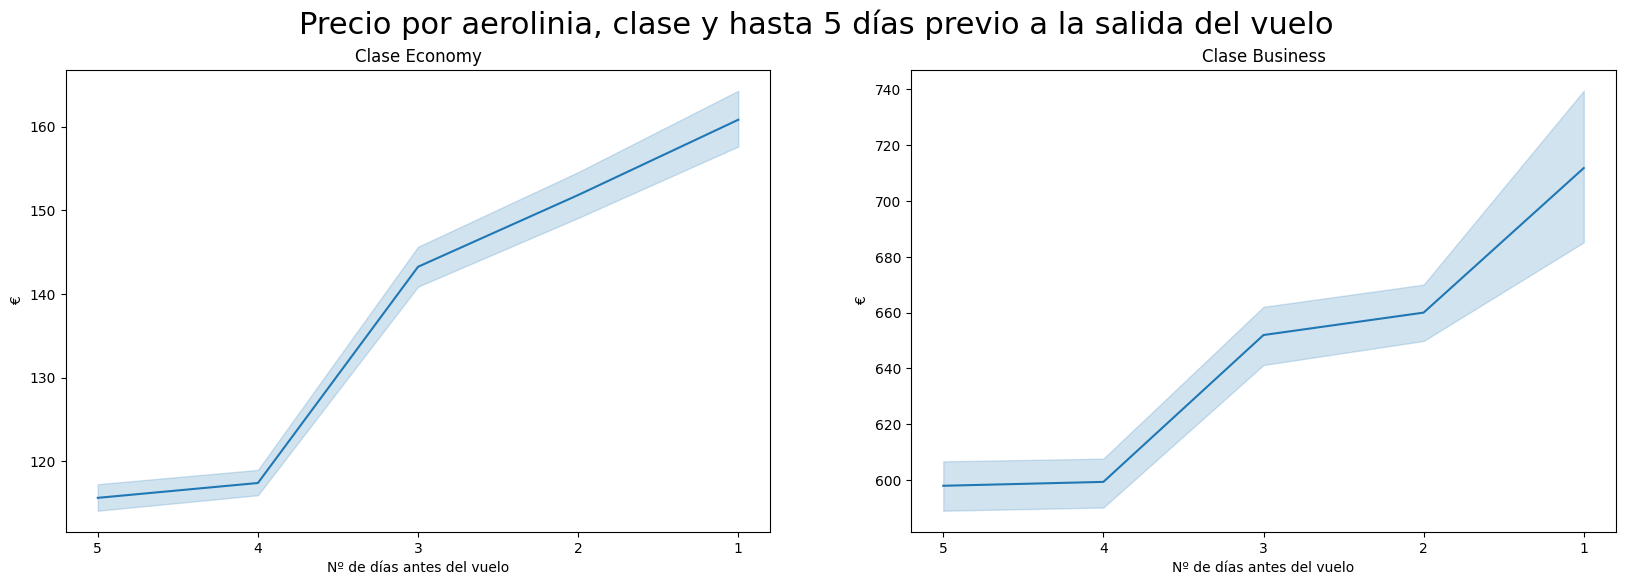

In [37]:
temp=df[df['days_left']<6].loc[:,('days_left','class','price_euros')]


fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Economy'],ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Business'],ax=ax[1])
fig.suptitle("Precio por aerolinia, clase y hasta 5 días previo a la salida del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xticks=([1,2,3,4,5]))
ax[1].set(xticks=([1,2,3,4,5]))
ax[0].set(xlabel='Nº de días antes del vuelo', ylabel='€')
ax[1].set(xlabel='Nº de días antes del vuelo', ylabel='€')
g1.invert_xaxis()
g2.invert_xaxis();

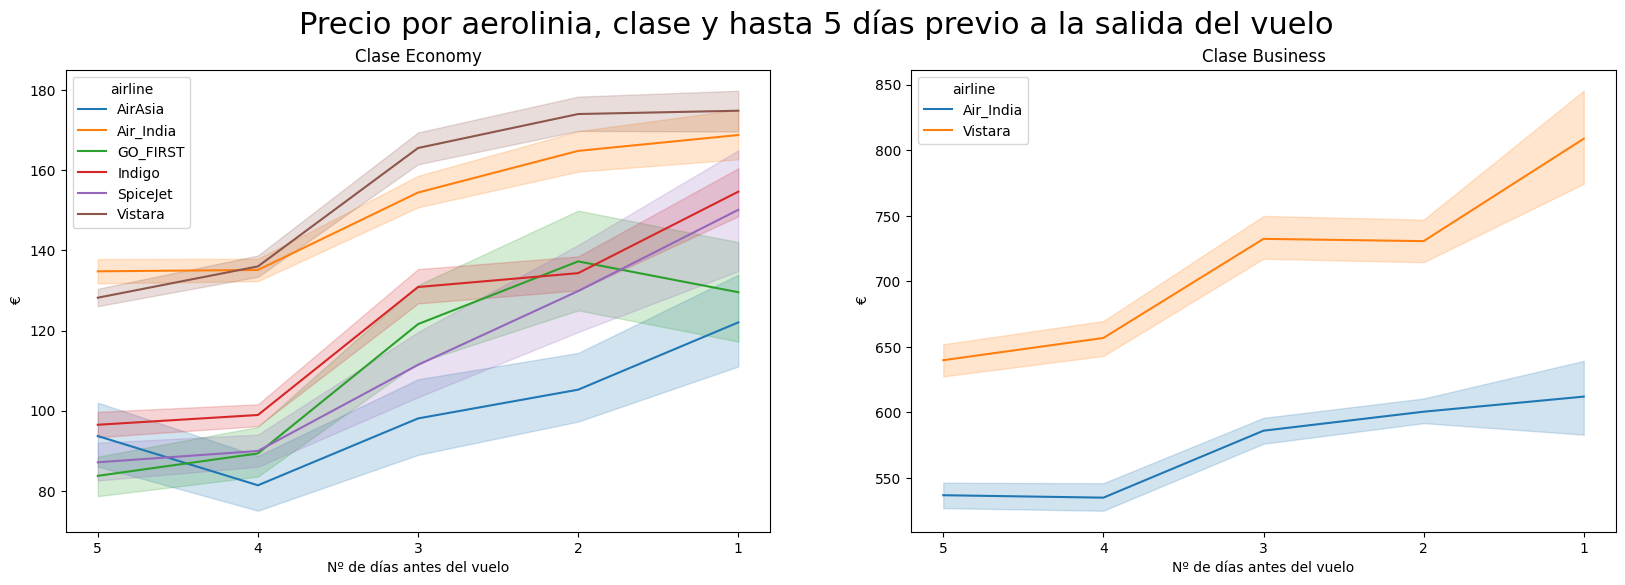

In [38]:
temp=df[df['days_left']<6].loc[:,('days_left','airline','class','price_euros')]


fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Economy'],hue='airline',ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Business'],hue='airline',ax=ax[1])
fig.suptitle("Precio por aerolinia, clase y hasta 5 días previo a la salida del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xticks=([1,2,3,4,5]))
ax[1].set(xticks=([1,2,3,4,5]))
ax[0].set(xlabel='Nº de días antes del vuelo', ylabel='€')
ax[1].set(xlabel='Nº de días antes del vuelo', ylabel='€')
g1.invert_xaxis()
g2.invert_xaxis();

Como norma general los precio siguen aumentando hasta el último día de venta excepto la aerolinea GO_FIRT que baja lo precios en casi todos sus vuelos, especialmente destino Bangalore.

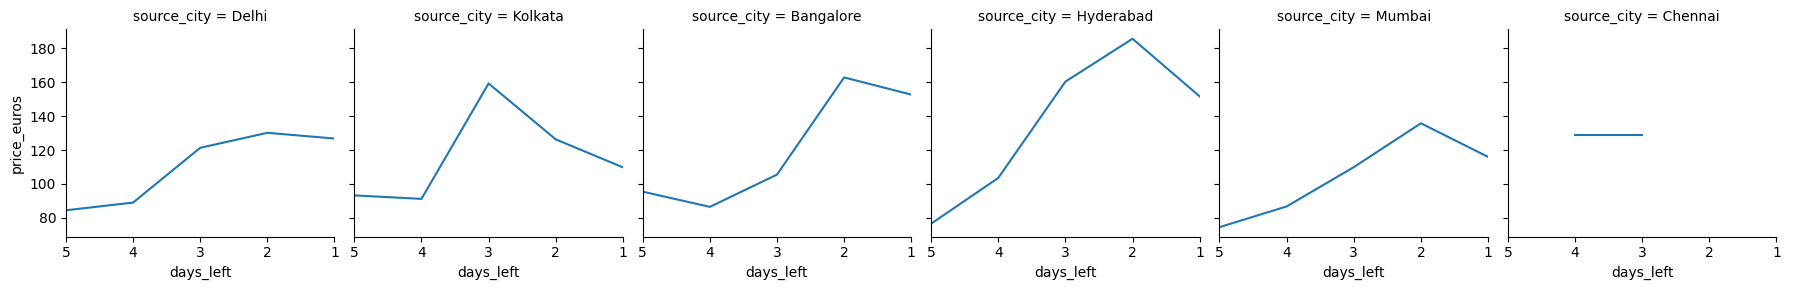

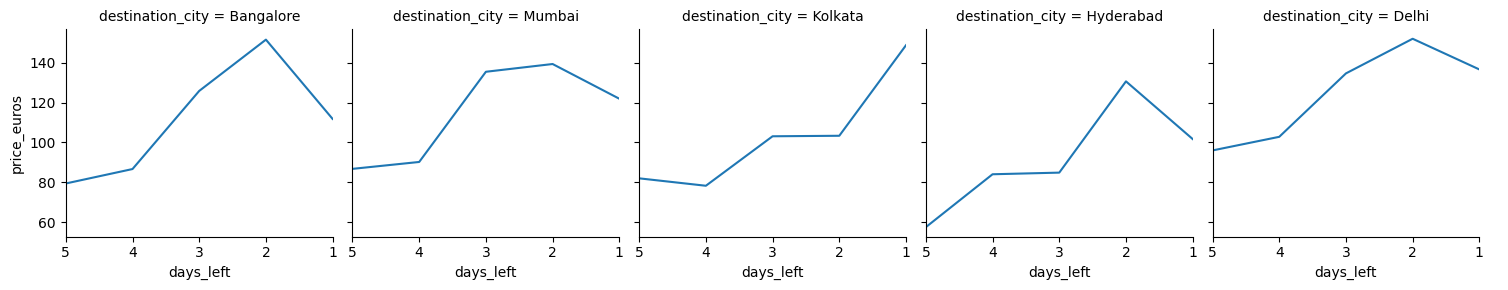

In [39]:
temp=df[(df['days_left']<6) & (df['class']=='Economy')&(df['airline']=='GO_FIRST')]


g1 = sns.FacetGrid(data=temp, col='source_city')
g1 = g1.map(sns.lineplot, 'days_left', 'price_euros', errorbar=None).add_legend()
g2 = sns.FacetGrid(data=temp, col='destination_city')
g2 = g2.map(sns.lineplot, 'days_left', 'price_euros', errorbar=None).add_legend()
g1.set(xlim=(5,1))
g2.set(xlim=(5,1));

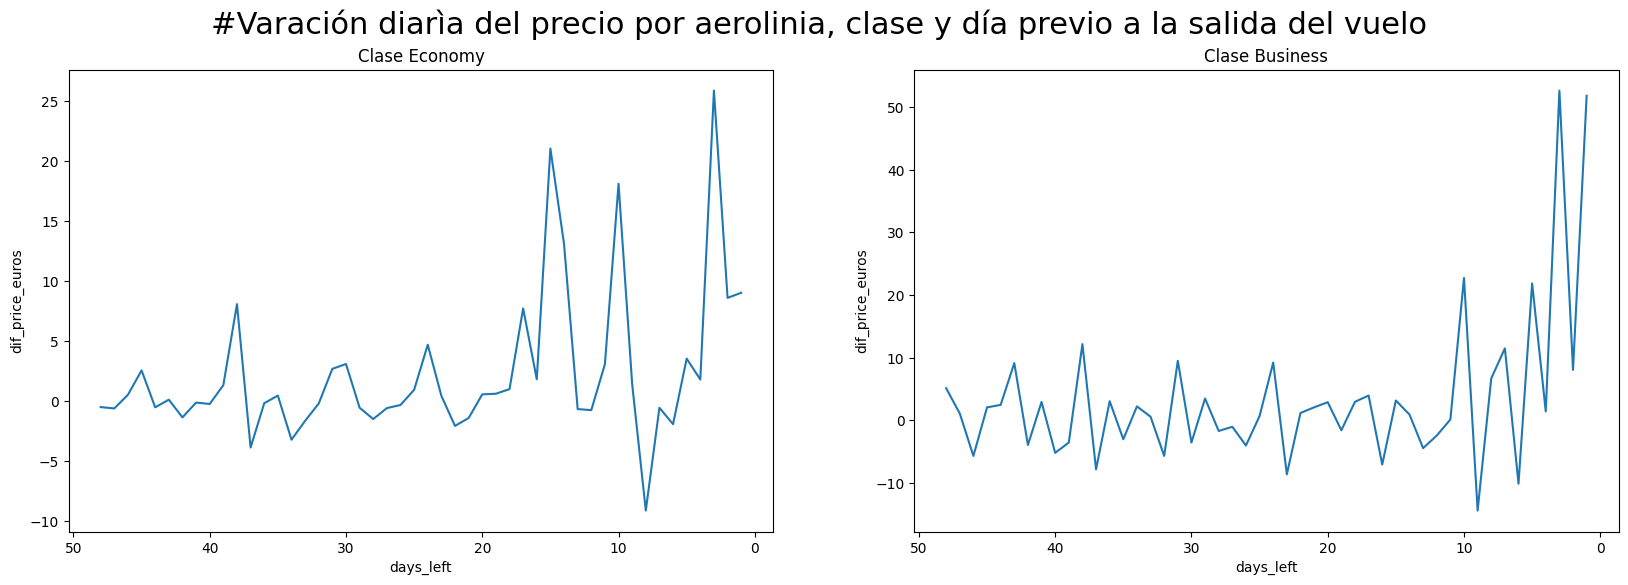

In [40]:
temp1=df[df['class']=='Economy'].groupby(['days_left','class'],as_index=False).price_euros.mean()
temp1['dif_price_euros'] = temp1['price_euros'].diff(periods=-1)

temp2=df[df['class']=='Business'].groupby(['days_left','class'],as_index=False).price_euros.mean()
temp2['dif_price_euros'] = temp2['price_euros'].diff(periods=-1)

fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='dif_price_euros',data=temp1,ax=ax[0])
g2=sns.lineplot(x='days_left',y='dif_price_euros',data=temp2,ax=ax[1])
fig.suptitle("#Varación diarìa del precio por aerolinia, clase y día previo a la salida del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
g1.invert_xaxis()
g2.invert_xaxis();

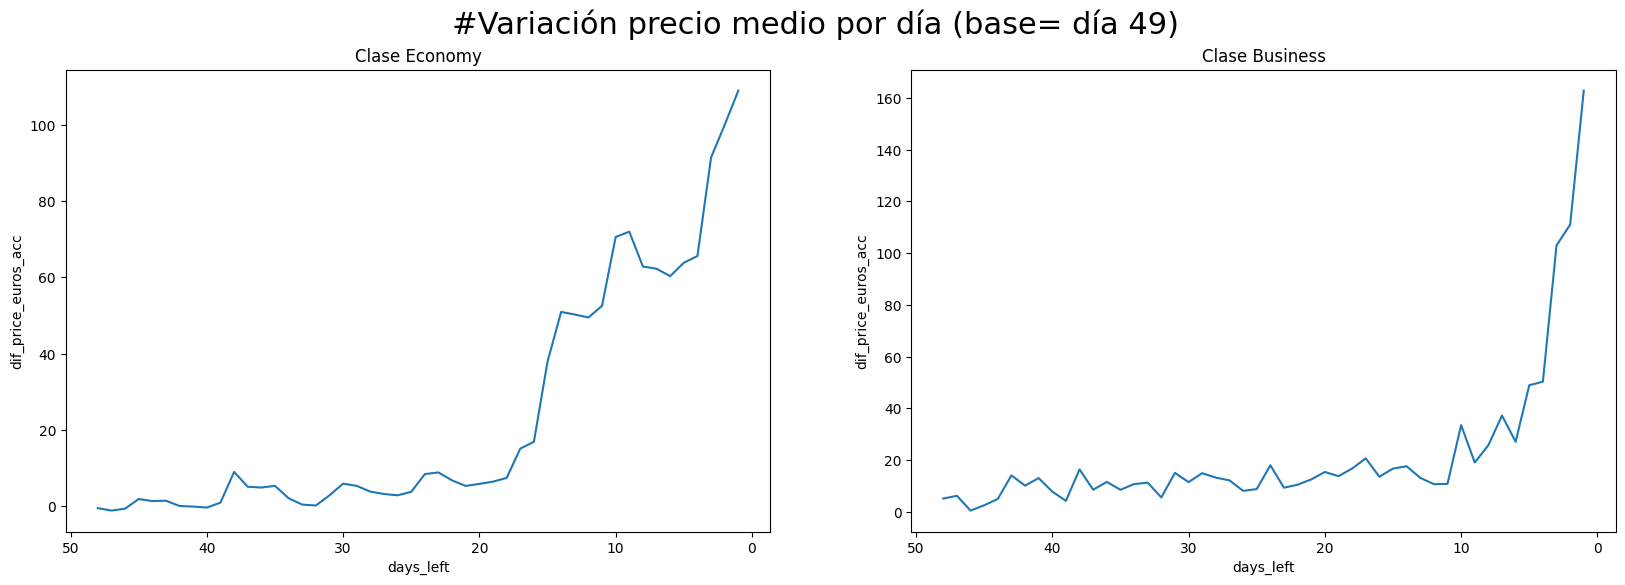

In [41]:
temp1=df[df['class']=='Economy'].groupby(['days_left','class'],as_index=False).price_euros.mean().sort_values('days_left',ascending=False)
temp1['dif_price_euros'] = temp1['price_euros'].diff()
temp1['dif_price_euros_acc']=temp1.dif_price_euros.cumsum()

temp2=df[df['class']=='Business'].groupby(['days_left','class'],as_index=False).price_euros.mean().sort_values('days_left',ascending=False)
temp2['dif_price_euros'] = temp2['price_euros'].diff()
temp2['dif_price_euros_acc']=temp2.dif_price_euros.cumsum()

fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='dif_price_euros_acc',data=temp1,ax=ax[0])
g2=sns.lineplot(x='days_left',y='dif_price_euros_acc',data=temp2,ax=ax[1])
# g3=sns.lineplot(x='days_left',y='price_euros',data=temp1,ax=ax[0])
fig.suptitle("#Variación precio medio por día (base= día 49)",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
g1.invert_xaxis()
g2.invert_xaxis();

#### ¿Cambia el precio del billete en función de la hora de salida y de llegada?

In [42]:
temp=df.loc[:,('class','arrival_time','departure_time','price_euros')].sort_values(['arrival_time','departure_time'])
temp_melt=pd.melt(temp,id_vars=['class','price_euros'], value_vars=['arrival_time','departure_time'],var_name='arr&dep', value_name='slot_time')
temp_melt

,class,price_euros,arr&dep,slot_time
0,Economy,80.875000,arrival_time,1-Early_Morning
1,Economy,80.875000,arrival_time,1-Early_Morning
2,Economy,80.875000,arrival_time,1-Early_Morning
3,Economy,80.875000,arrival_time,1-Early_Morning
4,Economy,78.488636,arrival_time,1-Early_Morning
...,...,...,...,...
471983,Economy,51.125000,departure_time,6-Late_Night
471984,Economy,51.125000,departure_time,6-Late_Night
471985,Economy,51.125000,departure_time,6-Late_Night
471986,Economy,51.125000,departure_time,6-Late_Night


[Text(0.5, 0, 'Horario'), Text(0, 0.5, '')]

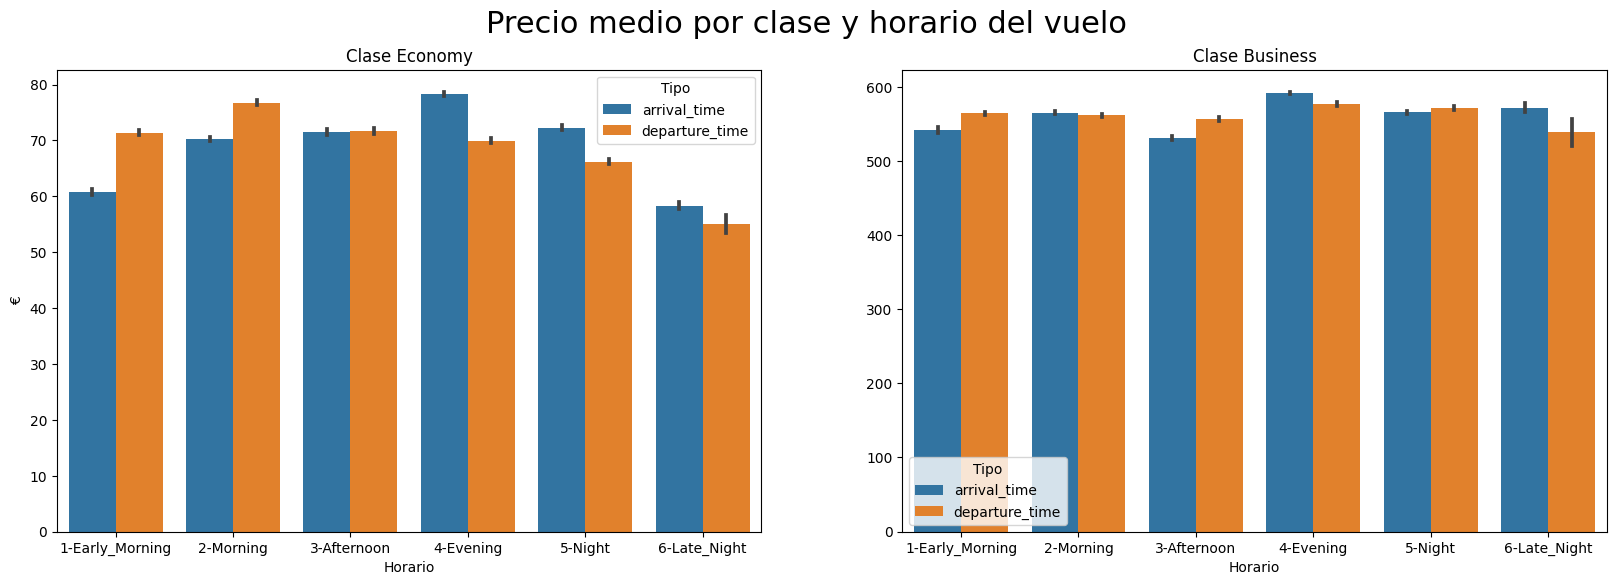

In [43]:
temp=df.loc[:,('class','arrival_time','departure_time','price_euros')].sort_values(['arrival_time','departure_time'])
temp_melt=pd.melt(temp,id_vars=['class','price_euros'], value_vars=['arrival_time','departure_time'],var_name='Tipo', value_name='slot_time')


fig,ax=plt.subplots (1,2,figsize=(20,6))
g1=sns.barplot(x='slot_time',y='price_euros',data=temp_melt[temp_melt['class']=='Economy'],hue='Tipo',ax=ax[0])
g2=sns.barplot(x='slot_time',y='price_euros',data=temp_melt[temp_melt['class']=='Business'],hue='Tipo',ax=ax[1])
fig.suptitle("Precio medio por clase y horario del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xlabel='Horario', ylabel='€')
ax[1].set(xlabel='Horario', ylabel='')
#g1.invert_xaxis()
#g2.invert_xaxis();

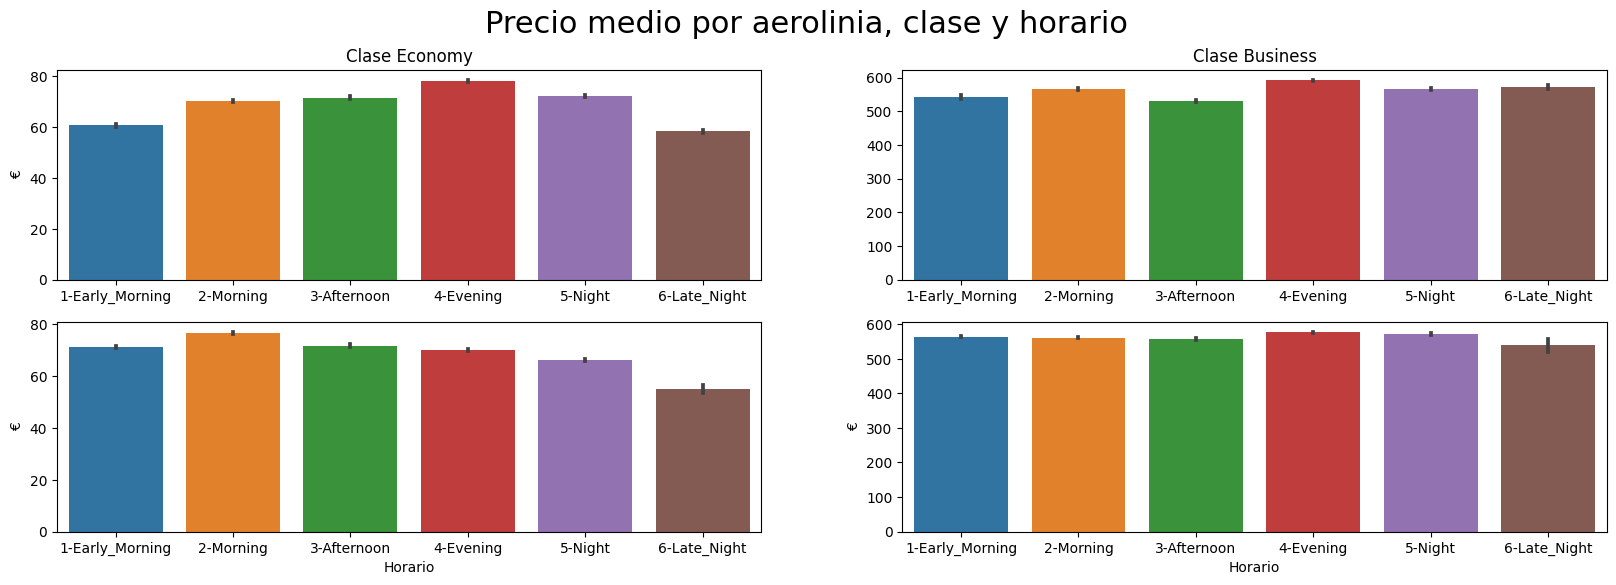

In [44]:
temp=df.loc[:,('class','arrival_time','departure_time','price_euros')].sort_values(['arrival_time','departure_time'])

fig,ax=plt.subplots (2,2,figsize=(20,6))
g1=sns.barplot(x='arrival_time',y='price_euros',data=temp[temp['class']=='Economy'],ax=ax[0,0])
g2=sns.barplot(x='departure_time',y='price_euros',data=temp[temp['class']=='Economy'],ax=ax[1,0])
g3=sns.barplot(x='arrival_time',y='price_euros',data=temp[temp['class']=='Business'],ax=ax[0,1])
g4=sns.barplot(x='departure_time',y='price_euros',data=temp[temp['class']=='Business'],ax=ax[1,1])

fig.suptitle("Precio medio por aerolinia, clase y horario",fontsize=22)
ax[0,0].set(title="Clase Economy")
ax[0,1].set(title="Clase Business")
ax[1,1].set(xlabel='Horario', ylabel='€')
ax[1,0].set(xlabel='Horario', ylabel='€')
ax[0,1].set(xlabel='', ylabel='')
ax[0,0].set(xlabel='', ylabel='€');

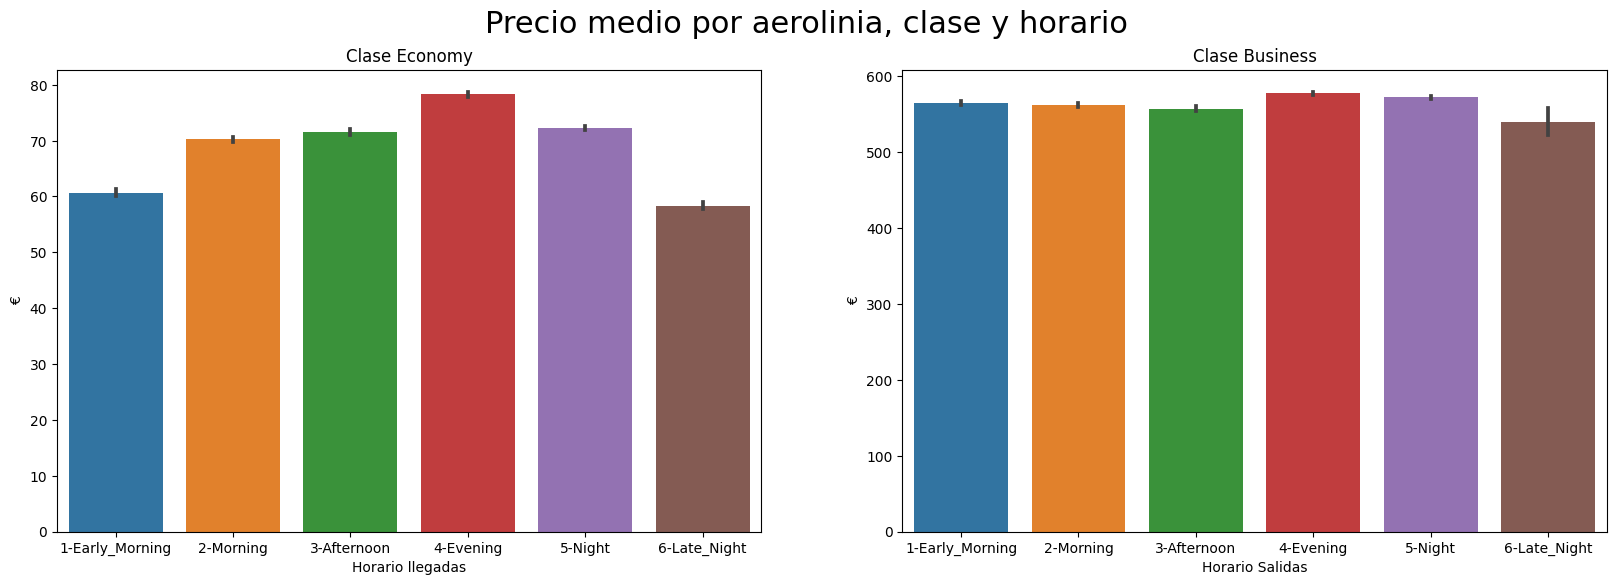

In [45]:
temp=df.loc[:,('class','arrival_time','departure_time','price_euros')].sort_values(['arrival_time','departure_time'])

fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.barplot(x='arrival_time',y='price_euros',data=temp[temp['class']=='Economy'],ax=ax[0])
g2=sns.barplot(x='departure_time',y='price_euros',data=temp[temp['class']=='Business'],ax=ax[1])

fig.suptitle("Precio medio por aerolinia, clase y horario",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xlabel='Horario llegadas', ylabel='€')
ax[1].set(xlabel='Horario Salidas', ylabel='€');

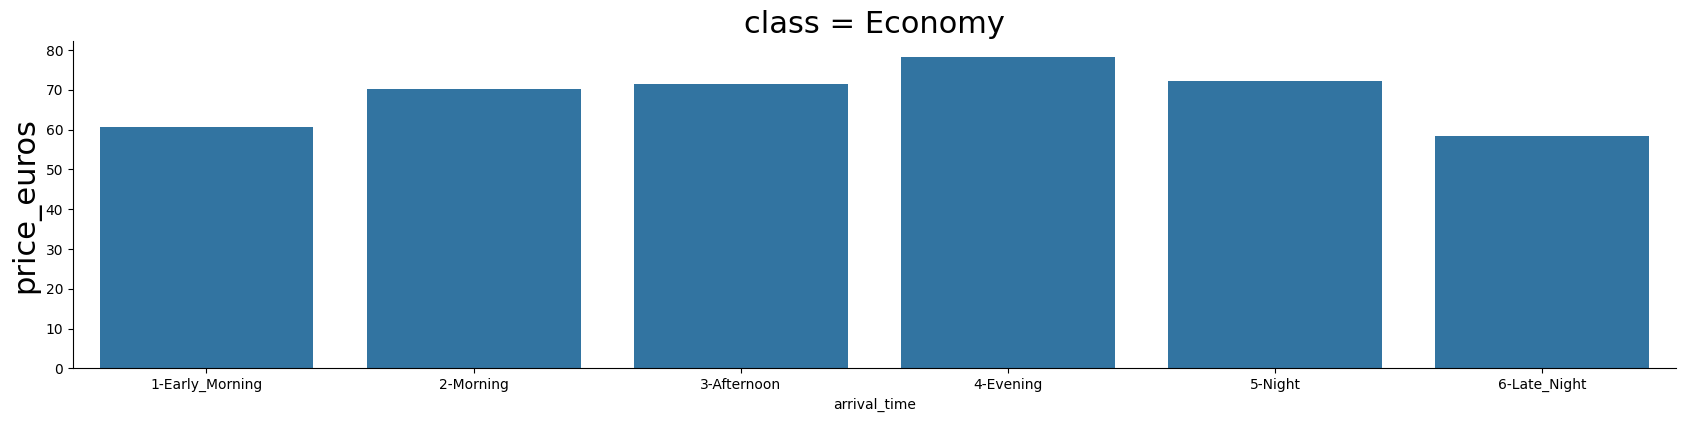

In [46]:
temp=df.loc[:,('class','arrival_time','departure_time','price_euros')].sort_values(['arrival_time','departure_time'])


g1 = sns.FacetGrid(data=temp[temp['class']=='Economy'], col='class',height=4.2, aspect=4)
g1 = g1.map(sns.barplot, 'arrival_time', 'price_euros', errorbar=None,order=temp['arrival_time'].unique().tolist())
g1.set_titles(size=22)
g1.set_ylabels(size=22);


#### ¿Cómo varía el precio con el cambio de origen y destino?

In [47]:
temp=df[df['class']=='Business'].groupby(['source_city','destination_city','class'],as_index=False).price_euros.mean()
temp=temp.pivot(index=(['source_city','class']),columns='destination_city', values='price_euros')
temp_t=temp.transpose().mean().to_frame()
temp=temp.mean().to_frame()
temp_t=temp_t.reset_index()
temp_t.rename(columns={0:'price_source','source_city':'city'},inplace=True)
temp=temp.reset_index()
temp.rename(columns={0:'price_destination'},inplace=True)
temp_bisn=pd.merge(temp_t,temp, left_on='city',right_on='destination_city')
temp_bisn.drop(['destination_city'], axis=1,inplace=True)
temp_bisn_melt=pd.melt(temp_bisn, id_vars=['city','class'],value_vars=['price_source','price_destination'], var_name='Precio',value_name='valor')
temp=df[df['class']=='Economy'].groupby(['source_city','destination_city','class'],as_index=False).price_euros.mean()
temp=temp.pivot(index=(['source_city','class']),columns='destination_city', values='price_euros')
temp_t=temp.transpose().mean().to_frame()
temp=temp.mean().to_frame()
temp_t=temp_t.reset_index()
temp_t.rename(columns={0:'price_source','source_city':'city'},inplace=True)
temp=temp.reset_index()
temp.rename(columns={0:'price_destination'},inplace=True)
temp_eco=pd.merge(temp_t,temp, left_on='city',right_on='destination_city')
temp_eco.drop(['destination_city'], axis=1,inplace=True)
temp_eco_melt=pd.melt(temp_eco, id_vars=['city','class'],value_vars=['price_source','price_destination'], var_name='Precio',value_name='valor')
temp_melt=pd.concat([temp_bisn_melt,temp_eco_melt], ignore_index=True)




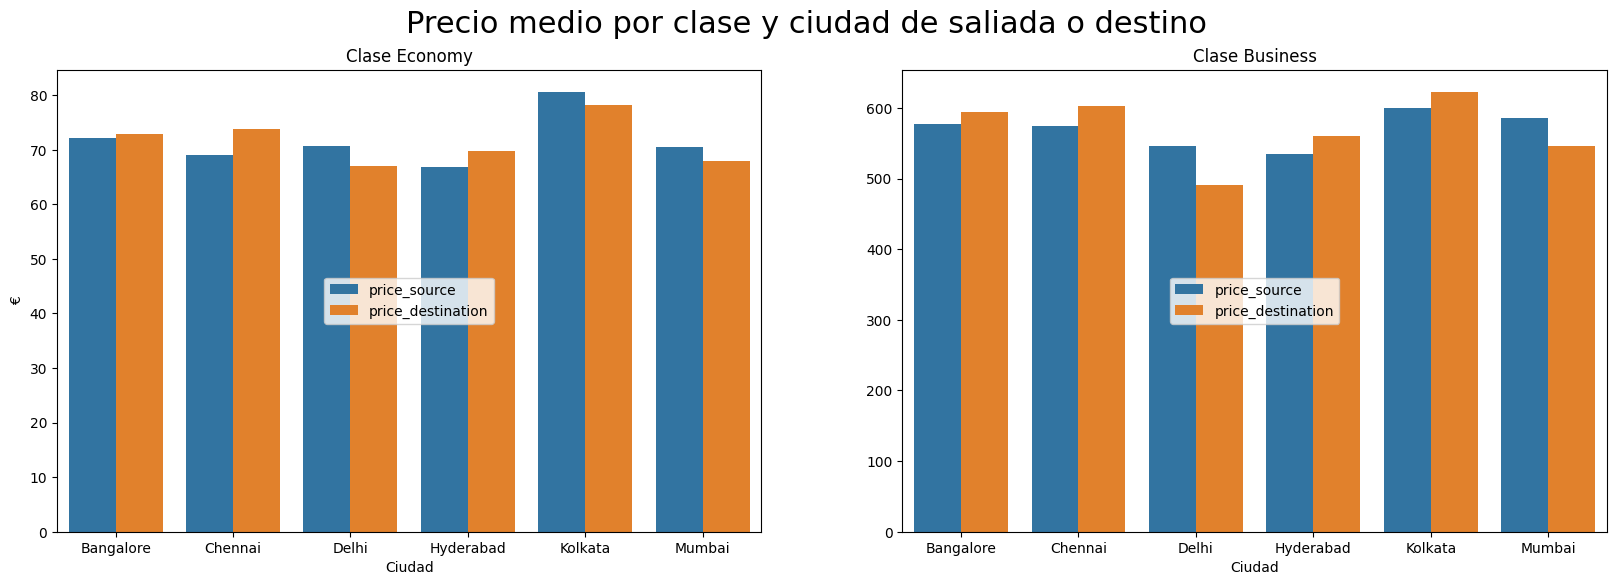

In [48]:
temp_melt

fig,ax=plt.subplots (1,2,figsize=(20,6))
g1=sns.barplot(x='city',y='valor',data=temp_melt[temp_melt['class']=='Economy'],hue='Precio',ax=ax[0]).legend(loc ='center')
g2=sns.barplot(x='city',y='valor',data=temp_melt[temp_melt['class']=='Business'],hue='Precio',ax=ax[1]).legend(loc ='center')
fig.suptitle("Precio medio por clase y ciudad de saliada o destino",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xlabel='Ciudad', ylabel='€')
ax[1].set(xlabel='Ciudad', ylabel='');
#g1.invert_xaxis()
#g2.invert_xaxis();

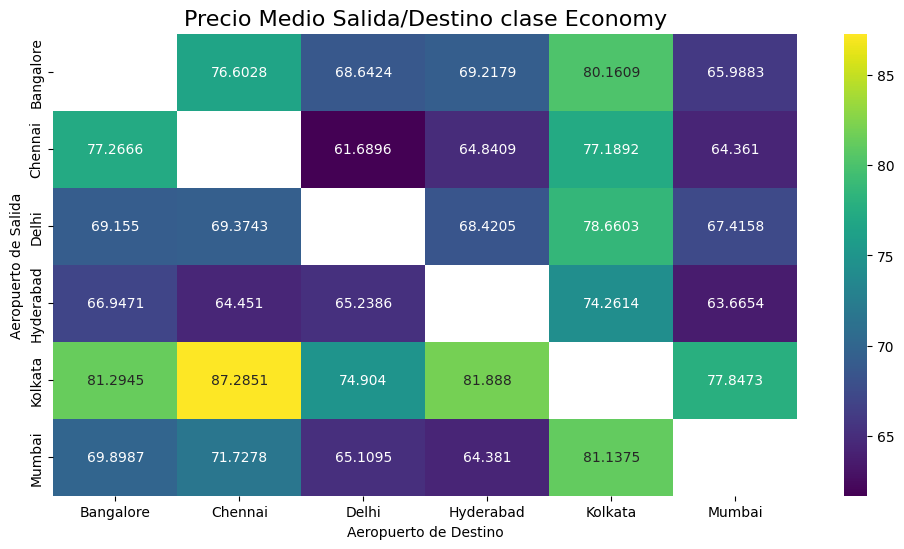

In [49]:
temp=df[df['class']=='Economy'].groupby(['source_city','destination_city'],as_index=False).price_euros.mean()
temp=temp.pivot(index='source_city',columns='destination_city', values='price_euros')

fig,ax=plt.subplots(1,1,figsize=(12,6))

g=sns.heatmap(temp, annot=True, fmt="g", cmap='viridis')
ax.set(xlabel='Aeropuerto de Destino', ylabel='Aeropuerto de Salida')
g.set_title('Precio Medio Salida/Destino clase Economy',size=16)

plt.show();

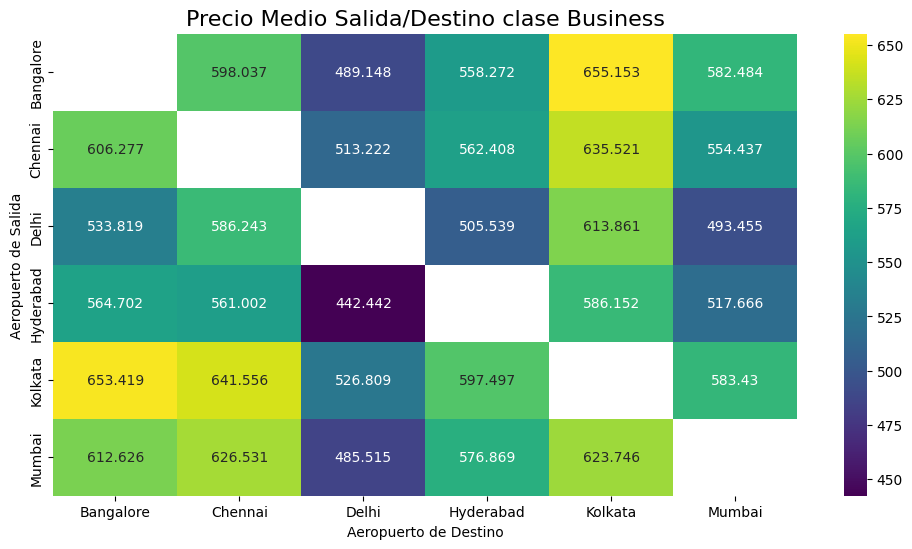

In [50]:
temp=df[df['class']=='Business'].groupby(['source_city','destination_city'],as_index=False).price_euros.mean()
temp=temp.pivot(index='source_city',columns='destination_city', values='price_euros')

fig,ax=plt.subplots(1,1,figsize=(12,6))

g=sns.heatmap(temp, annot=True, fmt="g", cmap='viridis')
ax.set(xlabel='Aeropuerto de Destino', ylabel='Aeropuerto de Salida')
g.set_title('Precio Medio Salida/Destino clase Business',size=16)

plt.show();

In [51]:
temp=df[df['class']=='Business'].groupby(['source_city','destination_city','class','days_left'],as_index=False).price_euros.mean()
temp=temp.pivot(index=(['source_city','class','days_left']),columns='destination_city', values='price_euros')
temp_t=temp.transpose().mean().to_frame()
temp=temp.mean().to_frame()
temp_t=temp_t.reset_index()
temp_t.rename(columns={0:'price_source','source_city':'city'},inplace=True)
temp=temp.reset_index()
temp.rename(columns={0:'price_destination'},inplace=True)
temp_bisn=pd.merge(temp_t,temp, left_on='city',right_on='destination_city')
temp_bisn.drop(['destination_city'], axis=1,inplace=True)
#temp_bisn_melt=pd.melt(temp_bisn, id_vars=['city','class','days_left'],value_vars=['price_source','price_destination'], var_name='Precio',value_name='valor')
temp=df[df['class']=='Economy'].groupby(['source_city','destination_city','class','days_left'],as_index=False).price_euros.mean()
temp=temp.pivot(index=(['source_city','class','days_left']),columns='destination_city', values='price_euros')
temp_t=temp.transpose().mean().to_frame()
temp=temp.mean().to_frame()
temp_t=temp_t.reset_index()
temp_t.rename(columns={0:'price_source','source_city':'city'},inplace=True)
temp=temp.reset_index()
temp.rename(columns={0:'price_destination'},inplace=True)
temp_eco=pd.merge(temp_t,temp, left_on='city',right_on='destination_city')
temp_eco.drop(['destination_city'], axis=1, inplace=True)
#temp_eco_melt=pd.melt(temp_eco, id_vars=['city','class'],value_vars=['price_source','price_destination'], var_name='Precio',value_name='valor')
#temp_melt=pd.concat([temp_bisn_melt,temp_eco_melt], ignore_index=True)


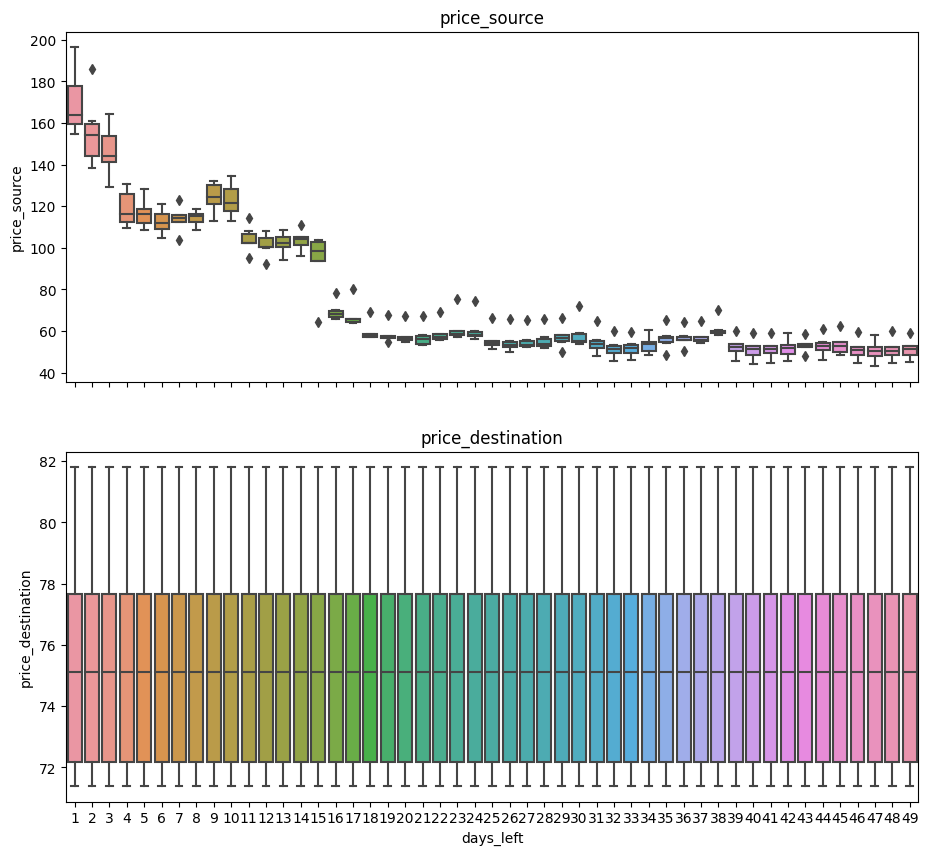

In [52]:
fig, ejes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for nombre, eje in zip(['price_source','price_destination'], ejes):
    sns.boxplot(data=temp_eco,x='days_left',y=nombre,ax=eje)
    eje.set_title(nombre)
    if eje != ejes[-1]:
        eje.set_xlabel('')

#### ¿Cómo varía el precio del billete entre la clase Turista y la Business?

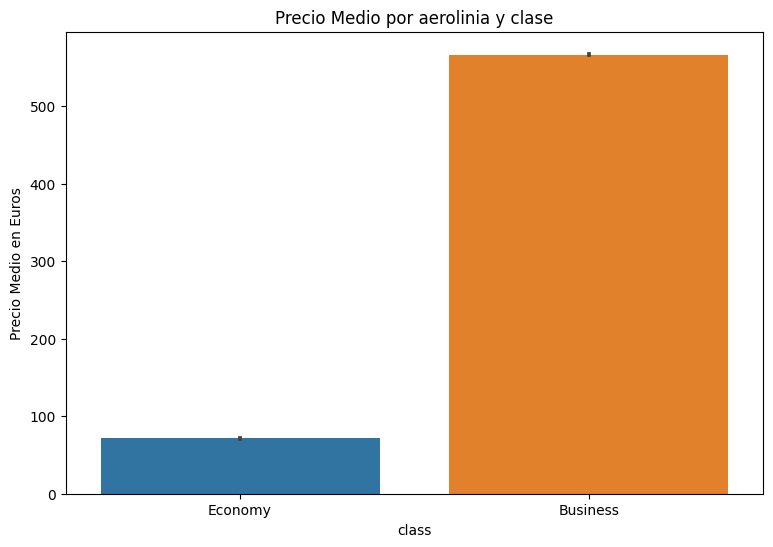

In [53]:
'''Obtenemos el precio por clase'''
plt.figure(figsize=(9,6));
sns.barplot(x='class',y='price_euros',data=df)
plt.ylabel("Precio Medio en Euros")
plt.title("Precio Medio por aerolinia y clase");